In [31]:
# Import libraries for data manipulation, machine learning, and visualization
import pandas as pd                        # For data handling using DataFrames
import numpy as np                         # For numerical operations
import tensorflow as tf                    # For building and training neural networks
from sklearn.model_selection import train_test_split  # To split dataset into training and testing sets
from sklearn.preprocessing import StandardScaler      # To normalize features before training
import matplotlib.pyplot as plt            # For plotting training metrics and predictions
import warnings                            # To manage warning messages
warnings.filterwarnings('ignore')          # Ignore any warnings to keep output clean

In [32]:
# Load the Boston Housing dataset from CSV
data = pd.read_csv('Boston.csv')           # Read dataset into a pandas DataFrame
data.shape                                 # Display the number of rows and columns in the dataset

(506, 15)

In [33]:
# Preprocessing (Optional)
print(data.isnull().sum())                 # Print number of missing values in each column
data = data.dropna()                       # Remove rows with any missing values

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


In [34]:
print(data.duplicated().sum())             # Print number of duplicate rows
data = data.drop_duplicates()              # Remove duplicate rows from the dataset

0


In [35]:
print(f"Shape after removing Null & duplicates: {data.shape}")  # Print new shape of cleaned dataset

Shape after removing Null & duplicates: (506, 15)


In [36]:
print(data.columns)                        # Display column names of the dataset

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [37]:
# Assuming the target column is named 'medv' (adjust if different)
X = data.drop('medv', axis=1).values       # Features: drop the target column 'medv'
y = data['medv'].values                    # Target: the column 'medv' as a NumPy array

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                                  # Features and target
    test_size=0.2,                         # 20% of data for testing
    random_state=42                        # Seed to ensure reproducible split
)

In [39]:
# Scale the features
scaler = StandardScaler()                 # Create a StandardScaler instance for normalization
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data and scale
X_test_scaled = scaler.transform(X_test)        # Scale test data using same parameters

In [40]:
# Build the neural network model
model = tf.keras.Sequential([                      # Sequential model (layers added in order)
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer with 64 neurons
    tf.keras.layers.Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    tf.keras.layers.Dense(1)                       # Output layer for regression (1 neuron, linear activation)
])

In [41]:
# Compile the model
model.compile(
    optimizer='adam',       # Optimizer: Adam (adaptive gradient descent)
    loss='mse',             # Loss function: Mean Squared Error (good for regression)
    metrics=['mae']         # Metric to track: Mean Absolute Error (easier to interpret)
)

In [42]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,    # Training features and labels
    epochs=10,                 # Train for 100 iterations through the dataset
    batch_size=32,              # Use mini-batches of 32 samples
    validation_split=0.2,       # 20% of training data used for validation
    verbose=1
    # Show progress bar during training
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 575.5290 - mae: 22.2747 - val_loss: 523.2357 - val_mae: 21.3283
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 541.3478 - mae: 21.2657 - val_loss: 489.3929 - val_mae: 20.5606
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 528.9074 - mae: 21.2055 - val_loss: 451.6060 - val_mae: 19.6790
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 493.1896 - mae: 20.3318 - val_loss: 406.5009 - val_mae: 18.5699
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 413.9501 - mae: 18.5220 - val_loss: 352.4755 - val_mae: 17.1374
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 373.4941 - mae: 17.3462 - val_loss: 291.4858 - val_mae: 15.3370
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 322.8798 - mae: 15.6158 - val_loss: 226.6467 - val_mae: 13.1654
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 226.2360 - mae: 12.6692 - val_loss: 165.3749 - val_mae: 10.7851
Epoch 9/10
11/11

In [43]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)  # Evaluate on unseen test data
print(f"\nTest Mean Absolute Error: ${test_mae:.2f}k")                   # Print the MAE formatted in thousands


Test Mean Absolute Error: $6.57k


In [44]:
# Make predictions
predictions = model.predict(X_test_scaled)  # Predict house prices using the test data

# Plot training history
plt.figure(figsize=(12, 4))  # Create a figure with 2 subplots side by side

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

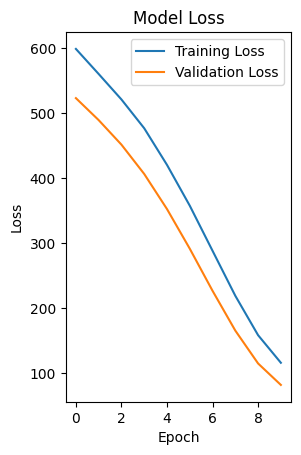

In [45]:
# Plot loss (MSE) over epochs
plt.subplot(1, 2, 1)                                  # First subplot
plt.plot(history.history['loss'], label='Training Loss')          # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')    # Plot validation loss
plt.title('Model Loss')                              # Title of plot
plt.xlabel('Epoch')                                  # Label x-axis
plt.ylabel('Loss')                                   # Label y-axis
plt.legend()                                         # Add legend

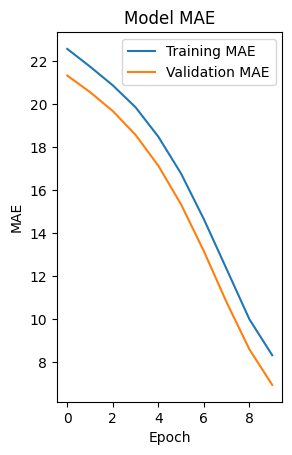

In [46]:
# Plot MAE over epochs
plt.subplot(1, 2, 2)                                  # Second subplot
plt.plot(history.history['mae'], label='Training MAE')            # Plot training MAE
plt.plot(history.history['val_mae'], label='Validation MAE')      # Plot validation MAE
plt.title('Model MAE')                                # Title of plot
plt.xlabel('Epoch')                                   # Label x-axis
plt.ylabel('MAE')                                     # Label y-axis
plt.legend()                                          # Add legend

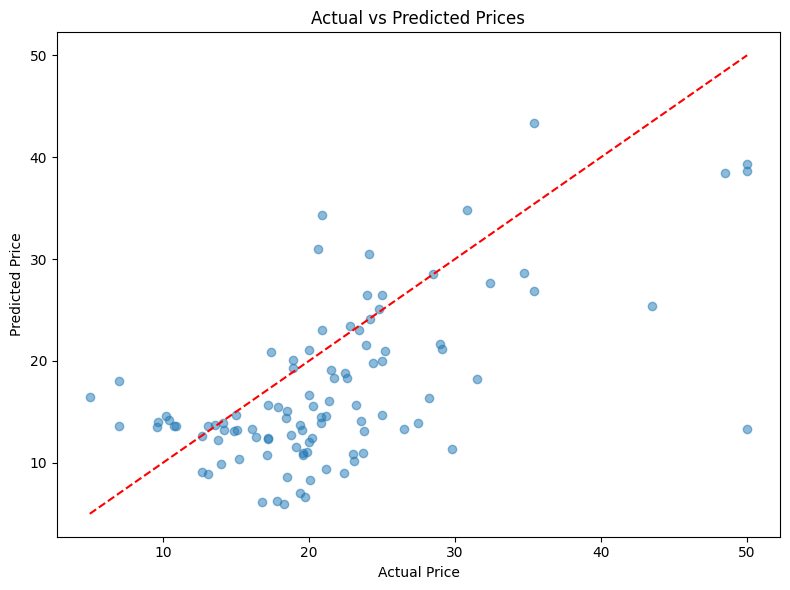

In [47]:
# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))                            # New figure for actual vs predicted plot
plt.scatter(y_test, predictions, alpha=0.5)           # Scatter plot of actual vs predicted prices
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line
plt.xlabel('Actual Price')                            # Label x-axis
plt.ylabel('Predicted Price')                         # Label y-axis
plt.title('Actual vs Predicted Prices')               # Plot title
plt.tight_layout()                                    # Automatically adjust subplot parameters
plt.show()                                            # Display the plots